# Dimensionality Reduction (Kernel PCA)

Author: Christoph Guettner

**Abstract**  
Im Folgenden wird das Iris Dataset mit vier Input Features (4 Dim) mittels PCA (und Kernel PCA)  
auf zunächst drei und anschließend auf zwei Dimensionen reduziert. Als neue Basis  
werden dabei die Eigenvektoren der (positiv definiten) Kovarianzmatrix bzw. Kernelmatrix   
genutzt. Während es sich bei der klassischen PCA um eine lineare Dimensionsreduktion handelt,  
kann die Kernel PCA zur nicht linearen Dimensionsreduktion herangezogen werden.   
Hier werden die folgenden Kernelfunktionen verwendet: 'linear', 'poly', 'rbf',  
'sigmoid', 'cosine'. Zudem werden vor und nach der Dimensionsreduktion die Varianz  
und Korrelation zwischen den Input Features dargestellt und die Scores verschiedener  
_Classifer_ ("Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest",  
"AdaBoost", "Naive Bayes") auf den verschiedenen Input Dimensionen verglichen. 


## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Class Imports](#Class_Imports)
    * [Functions](#Functions)
    * [Explorativ Data Visualisation](#Explorativ_Data_Visualisation)
    * [ANOVA](#ANOVA)

* [Principle Components Analysis](#Principle_Components_Analysis)
    * [Three Eigenvectors](#Three_Eigenvectors)
    * [Two Eigenvectors](#Two_Eigenvectors)
    * [Covariance Analysis of Resulting Vectorspaces](#Covariance_Analysis_of_Resulting_Vectorspaces)
    
* [Evaluation](#Evaluation)
    * [Comparativ Analysis of Classifier Performance](#Comparativ_Analysis_of_Classifier_Performance)

 

## Loading_and_Preprocessing

### Class_Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import KernelPCA

from sklearn import datasets
iris = datasets.load_iris()



In [2]:
# Functions

def load_data(dataset):
    features = {dataset.feature_names[i] : dataset.data[:,i] for i in range(len(dataset.feature_names))}
    target = {'target' : dataset.target}
    X = dataset.data
    y = dataset.target
    return features, target, X, y

def get_dataframe(features, target):
    df = pd.DataFrame(features)
    df_all = df.assign(**target)
    return df, df_all

def get_scatter_plot(df_feature, target):
    fig, axes = plt.subplots(1,1, figsize=(7,7), facecolor=(.18, .31, .31))
    fig.suptitle('Dependencies', color ='0.7')
    pd.plotting.scatter_matrix(df_feature, alpha = 1,diagonal= 'kde', c=target, ax = axes, cmap='cividis')
    axes.tick_params(labelcolor='0.7', rotation=30)
    plt.show()

def get_covariance(data):
    return data.cov()

def get_correlation(data):
    return data.corr() #Korrelationmatrix

def plot_DependencyMatrices(corr, cov):
    fig = plt.figure(figsize=(15,5), facecolor=(.18, .31, .31))
    plt.tick_params(labelcolor='tab:orange')
    plt.subplot(121)
    plt.title('Correlation Matrics', color='0.7')
    sns.heatmap(corr,xticklabels=[0,1,2,3], yticklabels=corr.columns, cmap='Blues', annot=True)
    plt.subplot(122)
    sns.heatmap(cov, xticklabels=[0,1,2,3], yticklabels=cov.columns, cmap='Blues', annot=True)
    plt.title('Covariance Matrics', color='0.7')
    plt.show()

def get_principle_components(X):
    X = StandardScaler().fit_transform(X)
    Projections_pca_3D =[]
    pca = decomposition.PCA(n_components=3)
    principleCom = pca.fit_transform(X)
    Projections_pca_3D.append(principleCom)
    for kern in kernels:
        kpca = KernelPCA(n_components=3, kernel=kern)
        principleCom = kpca.fit_transform(X)
        Projections_pca_3D.append(principleCom)
    return Projections_pca_3D

def get_3Dplots(pc, sep, method):
    fig = plt.figure(figsize=(15,10),facecolor=(.18, .31, .31))
    fig.suptitle('3D-Projections', color ='0.7')
    for i in range(len(method)):
        ax = fig.add_subplot(2,3,(i+1), projection='3d')
        ax.scatter(pc[i][:,0],pc[i][:,1],pc[i][:,2], c=[sep],cmap='cividis')
        ax.set_title(method[i], color='orange')
        ax.grid(color = (.18, .31, .31))

def get_2Dprinciple_components(threeD_list):
    twoD_list=[]
    for i in range(len(threeD_list)):
        twoD= np.delete(threeD_list[i], 2, axis=1)
        twoD_list.append(twoD)
    return twoD_list

def get_2Dplots(pc, sep, method):
    fig, axes = plt.subplots(2,3, figsize=(15,10), facecolor=(.18, .31, .31))
    fig.suptitle('2D-Projections', color ='0.7')
    for i,ax in enumerate(axes.flatten()):
        ax.scatter(pc[i][:,0],Projections_pca_2D[i][:,1], c=[sep], cmap='cividis')
        ax.set_title(method[i], color='orange')

def make_dictionary(key_list, value_list):
    k=0
    nPCs = 3
    dict_3D= {}
    for i in range(len(value_list)):
        for j in range(nPCs):
            dict_3D[key_list[k]] = value_list[i][:,j]
            k += 1
    return dict_3D

def make_dataframe(dict):
    df = pd.DataFrame(dict)
    return df

def get_multiple_correlation(df, columnnames):
    corr_3D_list=[]
    for i in range(len(columnnames)):
        if i % 3 ==0:
            corr_3D = df.iloc[:,i:(i+3)].corr()
            corr_3D_list.append(corr_3D)
    return corr_3D_list

def get_multiple_covariance(df, columnnames):
    cov_3D_list=[]
    for i in range(len(columnnames)):
        if (i+3) % 3 ==0:
            cov_3D = df.iloc[:,i:(i+3)].cov()
            cov_3D_list.append(cov_3D)
    return cov_3D_list


def plot_heatmaps(matrices_3D, method, title):
    fig, axes = plt.subplots(2,3, figsize=(15,7), facecolor=(.18, .31, .31), sharex=True, sharey=True)
    fig.suptitle(titel, color ='0.7')
    for j,ax in enumerate(axes.flatten()):
        sns.heatmap(matrices_3D[j], cmap='Blues', ax=ax, annot=True)
        ax.set_title(method[j], color='orange')

def combine_feature(array, list1, list2):
    Data=[]
    Data.append(array)
    Data = Data + list1 + list2
    return Data

def get_scores(feature, target):
    Score_list = []
    for i in range(len(feature)):
        X_train, X_test, y_train, y_test = train_test_split(feature[i], target, train_size=.8)
        for clf_names, clf in zip(names, classifiers):
            clf.fit(X_train,y_train)
            score = clf.score(X_test,y_test)
            Score_list.append(score)
    return Score_list

def get_list_piecewise(list, piece_size):
    list_piecewise = [list[i:i+piece_size] for i in range(0, len(list), piece_size)]
    return list_piecewise

def get_array_from(list):
    array = np.array(list)
    return  array

def make_dictionary_scores(key_list, value_list):
    dict_Scores= {}
    for i in range(len(key_list)):
        for j in range(len(classifiers)):
            dict_Scores[key_list[i]] = value_list[i]
    return dict_Scores


def make_dataframe_scores(dict): 
    df_Scores = pd.DataFrame(dict, index=names)
    df_Scores.loc['mean']= df_Scores.mean(axis='index')
    return df_Scores

def make_bar_plot(df):
    fig, axes = plt.subplots(1,1, figsize=(15,5), facecolor=(.18, .31, .31))
    fig.suptitle('Classifier_Scores', color ='0.7')
    df.loc['mean'].plot.bar(figsize=(15,5), cmap ='seismic', ax=axes,rot=35)
    



### Explorative_Data_Visualisation


In [3]:

features_iris, target_iris, X_iris, y_iris = load_data(iris)
df_iris, df_iris_all = get_dataframe(features_iris, target_iris)

df_iris_all.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### ANOVA  
Im folgenden werden die Kovarianz (bzw. die standardisierte  
Korrelation zunächst mittels eines Scatter Plots daragestellt. 

Kovarianzmatrix:  $\Sigma_{X} = X \cdot X^T$

Anschließend werden die Korrelations und Kovarianzmatrizen   
berechnet und mittels einer Heatmap dargestellt. 



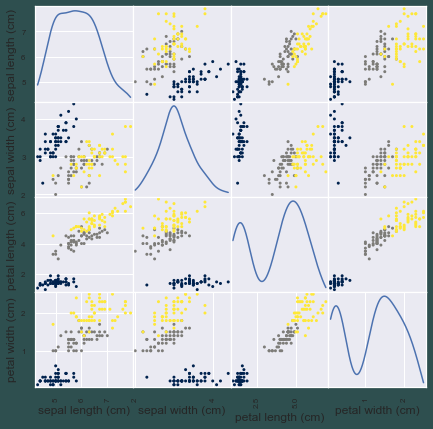

In [36]:

get_scatter_plot(df_iris, y_iris)

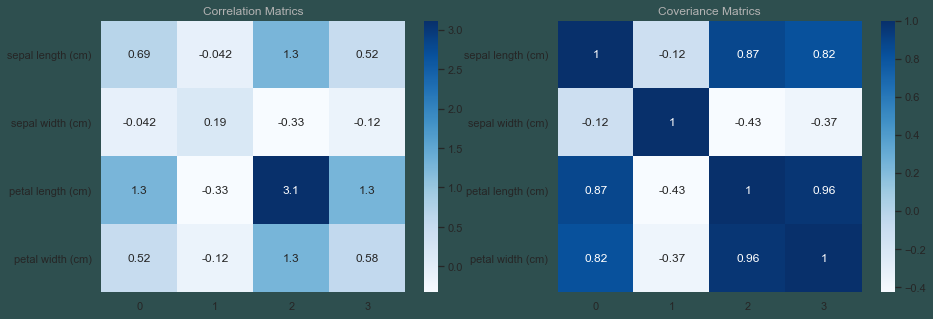

In [13]:

corr_feature = get_covariance(df_iris)
cov_feature = get_correlation(df_iris)
plot_DependencyMatrices(corr_feature, cov_feature) #Kovarianzmatrix


## Principle_Components_Analysis

Im folgenden werden die Projektionen der Datan auf die Principle Components  
visulaisert (3D und 2D). Die PCA ist ein gänges Verfahren in der multivariaten  
Statistik zur Dimension-Reduktion, das bei höher dimensionalen Input Featuren   
($X^{n \times m}$) eingesetzt wird. Bei der Reduktion wird versucht  
den Informationsverlust zu minmieren indem die erhaltene Varianz bei der  
Basistransformation maximiert wird und nach der Größe der jeweiligen Eigenwerte  
sortiert.

Eigenwerte:  $det(\lambda I - \Sigma)= 0$  

Als neue Basis werden eine Auswahl der orthogonalen Eigenvektoren  
der Kovarianzmatrix bzw. Kernelmatrix gebildet.  

Eigenvektoren:  $(\lambda I - \Sigma) \cdot x= 0 $

Zuletzt werden die Input Feature auf die neue Basis projeziert. 




### Three_Eigenvectors

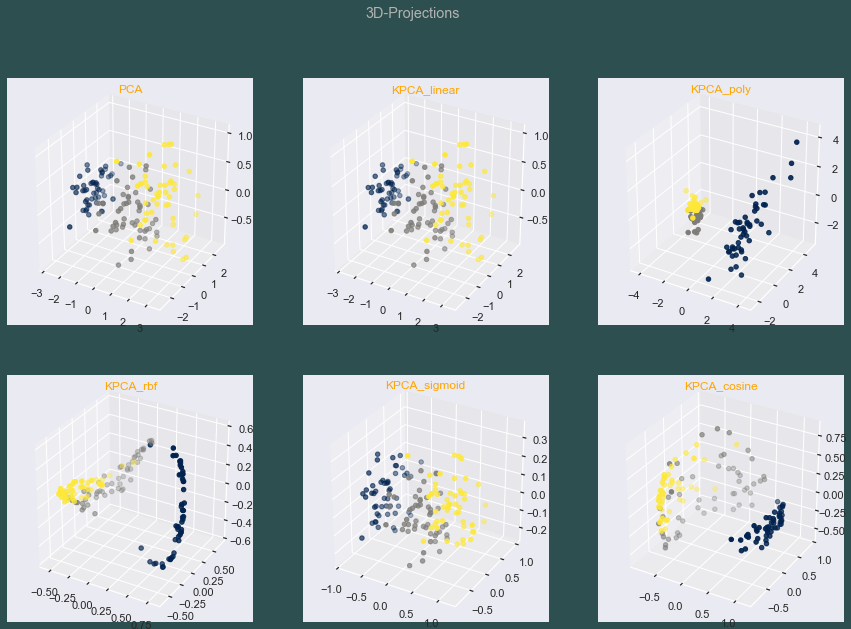

In [87]:
kernels= ['linear', 'poly','rbf','sigmoid','cosine']
Method = ['PCA', 'KPCA_linear','KPCA_poly','KPCA_rbf','KPCA_sigmoid','KPCA_cosine']

Projections_pca_3D = get_principle_components(X_iris)
get_3Dplots(Projections_pca_3D,iris.target, Method)
 
   
        

### Two_Eigenvectors
    

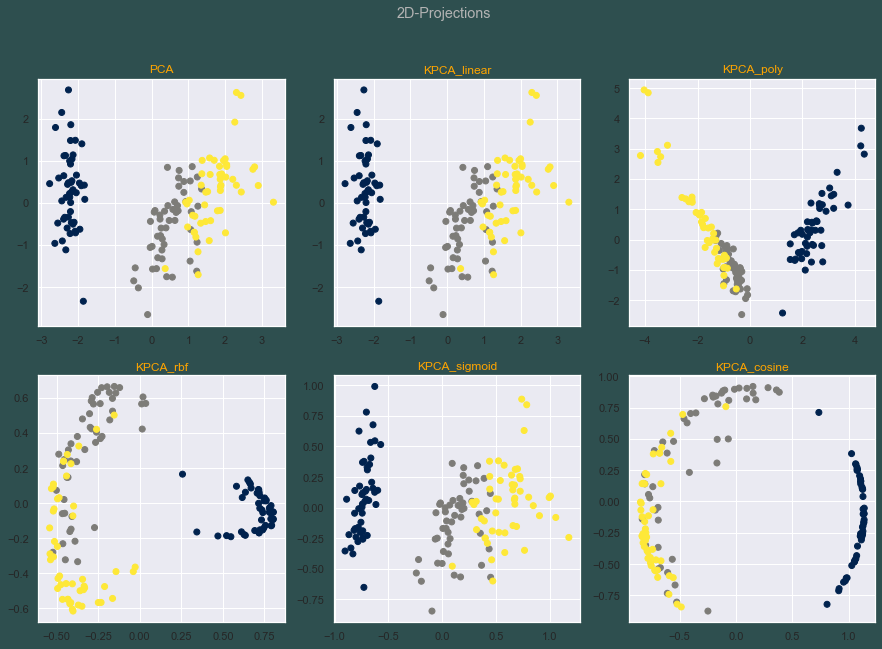

In [90]:
Projections_pca_2D = get_2Dprinciple_components(Projections_pca_3D)
get_2Dplots(Projections_pca_2D, iris.target, Method)


### Covariance_Analysis_of_Resulting_Vectorspaces

Beim resultierenden Vektorraum, wird davon ausgegangen, dass die Projektionen  
der Datanpunkte linear unabhängig sind. Dies liegt daran, dass die Diagonalisierung   
der Kovarianzmatrix bei der Hauptkomponentenanalyse einer Rotation  
des Koordinatensystems entspricht.

In [94]:

Method_3D_Components = ['3D_PCA_pc1', '3D_PCA_pc2', '3D_PCA_pc3','3D_KPCA_linear_pc1', '3D_KPCA_linear_pc2', '3D_KPCA_linear_pc3','3D_KPCA_poly_pc1', '3D_KPCA_poly_pc2', '3D_KPCA_poly_pc3','3D_KPCA_rbf_pc1', '3D_KPCA_rbf_pc2', '3D_KPCA_rbf_pc3','3D_KPCA_sigmoid_pc1', '3D_KPCA_sigmoid_pc2', '3D_KPCA_sigmoid_pc3','3D_KPCA_cosine_pc1', '3D_KPCA_cosine_pc2', '3D_KPCA_cosine_pc3']


PC_dictionary = make_dictionary(Method_3D_Components, Projections_pca_3D)
df_3D= make_dataframe(PC_dictionary)

df_3D.head(3)

,3D_PCA_pc1,3D_PCA_pc2,3D_PCA_pc3,3D_KPCA_linear_pc1,3D_KPCA_linear_pc2,3D_KPCA_linear_pc3,3D_KPCA_poly_pc1,3D_KPCA_poly_pc2,3D_KPCA_poly_pc3,3D_KPCA_rbf_pc1,3D_KPCA_rbf_pc2,3D_KPCA_rbf_pc3,3D_KPCA_sigmoid_pc1,3D_KPCA_sigmoid_pc2,3D_KPCA_sigmoid_pc3,3D_KPCA_cosine_pc1,3D_KPCA_cosine_pc2,3D_KPCA_cosine_pc3
0,-2.264703,0.480027,-0.127706,-2.264703,0.480027,-0.127706,2.538018,0.616479,-0.265221,0.802038,-0.093750,-0.165233,-0.736885,0.121459,-0.043896,1.124850,-0.255485,-0.045939
1,-2.080961,-0.674134,-0.234609,-2.080961,-0.674134,-0.234609,1.743247,-0.646389,-1.678191,0.665623,0.109343,0.428203,-0.738849,-0.251972,-0.114747,1.078072,0.252676,-0.118735
2,-2.364229,-0.341908,0.044201,-2.364229,-0.341908,0.044201,2.379874,-0.163158,-1.663715,0.758616,0.012529,0.303221,-0.808356,-0.171734,0.025973,1.125217,0.096343,0.015621


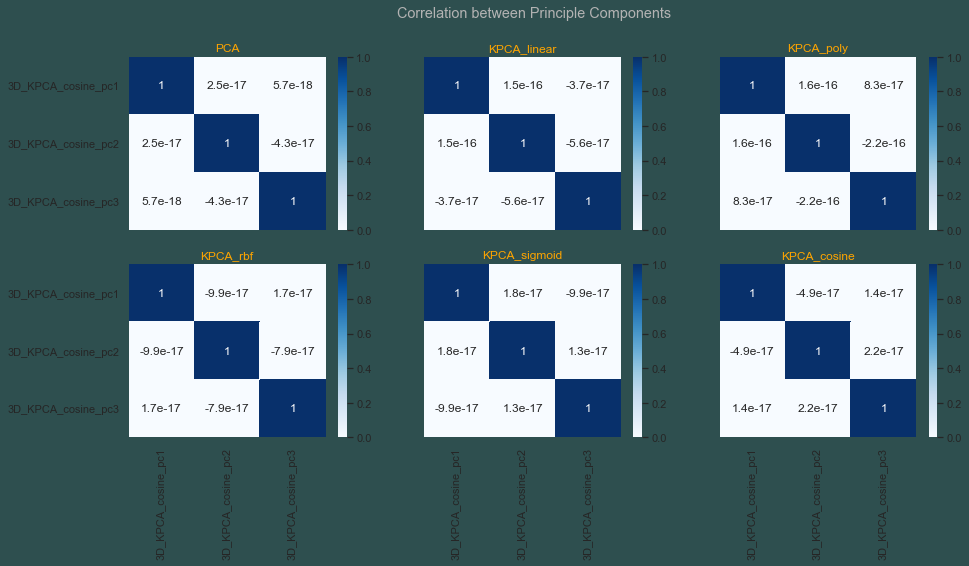

In [100]:

title = 'Correlation between Principle Components'
corr_3D_list = get_multiple_correlation(df_3D, Method_3D_Components)
plot_heatmaps(corr_3D_list, Method, title)


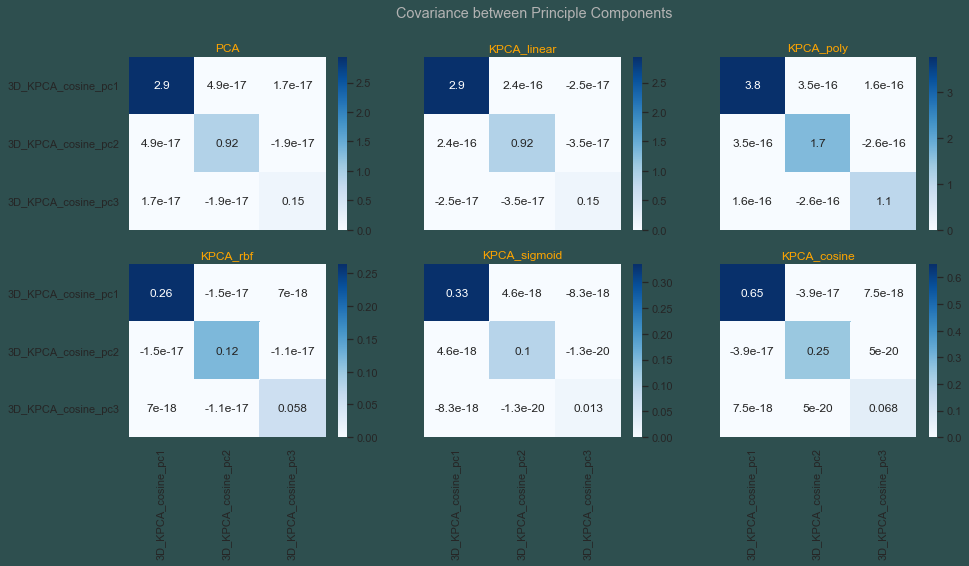

In [101]:

title= 'Covariance between Principle Components'
cov_3D_list = get_multiple_covariance(df_3D, Method_3D_Components)
plot_heatmaps(cov_3D_list, Method, title)



## Evaluation

### Comparativ_Analysis_of_Classifier_Performance

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [124]:
Method_Dim = ['Original','3D_PCA', '3D_KPCA_linear','3D_KPCA_poly','3D_KPCA_rbf','3D_KPCA_sigmoid','3D_KPCA_cosine', '2D_PCA', '2D_KPCA_linear','2D_KPCA_poly','2D_KPCA_rbf','2D_KPCA_sigmoid','2D_KPCA_cosine']

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

Feature_combined_iris = combine_feature(X_iris, Projections_pca_3D, Projections_pca_2D)
Score_list_iris = get_scores(Feature_combined_iris,y_iris)
Score_list_iris_piecewise = get_list_piecewise(Score_list_iris, 7)
Scores_array = get_array_from(Score_list_iris_piecewise)

Scores_dictionary = make_dictionary_scores(Method_Dim, Scores_array)

df_Scores= make_dataframe_scores(Scores_dictionary)    
df_Scores


,Original,3D_PCA,3D_KPCA_linear,3D_KPCA_poly,3D_KPCA_rbf,3D_KPCA_sigmoid,3D_KPCA_cosine,2D_PCA,2D_KPCA_linear,2D_KPCA_poly,2D_KPCA_rbf,2D_KPCA_sigmoid,2D_KPCA_cosine
Nearest Neighbors,0.966667,0.933333,0.966667,0.900000,0.966667,0.966667,0.900000,0.933333,0.933333,0.966667,0.766667,0.933333,0.833333
Linear SVM,0.966667,0.866667,0.933333,0.800000,0.666667,0.533333,0.800000,0.800000,0.900000,0.966667,0.533333,0.266667,0.566667
RBF SVM,0.966667,0.933333,0.933333,0.866667,0.933333,0.966667,0.900000,0.900000,0.933333,0.966667,0.800000,0.966667,0.833333
Decision Tree,0.966667,0.933333,0.900000,0.866667,0.933333,1.000000,0.900000,0.866667,0.966667,0.900000,0.800000,0.933333,0.766667
Random Forest,0.933333,0.766667,0.900000,0.866667,0.933333,0.966667,0.900000,0.900000,0.933333,1.000000,0.733333,0.900000,0.833333
AdaBoost,0.933333,0.966667,0.866667,0.700000,0.933333,0.900000,0.866667,0.866667,0.700000,0.700000,0.766667,0.633333,0.566667
Naive Bayes,0.933333,0.900000,0.933333,0.800000,0.933333,0.933333,0.900000,0.900000,0.866667,0.966667,0.800000,0.933333,0.900000
mean,0.952381,0.900000,0.919048,0.828571,0.900000,0.895238,0.880952,0.880952,0.890476,0.923810,0.742857,0.795238,0.757143


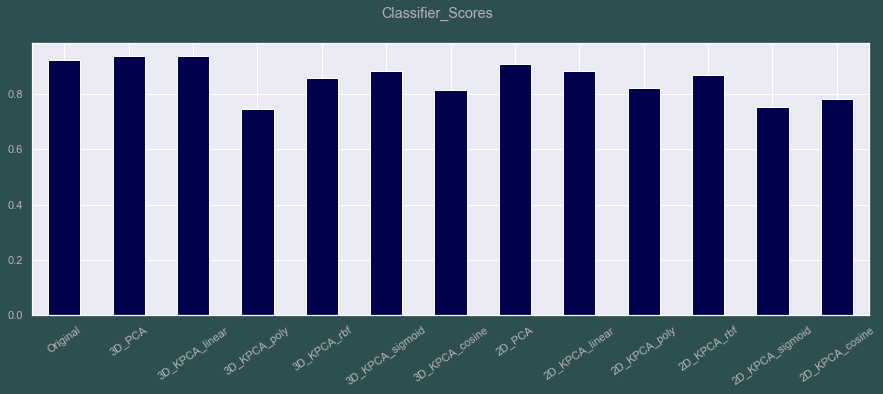

In [123]:

make_bar_plot(df_Scores)